## Customer Personality Analysis

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment. For more: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.metrics import silhouette_score
from matplotlib.cm import get_cmap

In [3]:
df = pd.read_csv('Data/marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleaning

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
#Copy of Dataset
copied_df = df.drop('ID', axis = 1)

# Calculate the mean of the 'Income' column, skipping NaN values
mean_income = copied_df['Income'].mean()

# Replace NaN values in the 'Income' column with the mean value
copied_df['Income'].fillna(mean_income, inplace=True)

In [6]:
copied_df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
copied_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

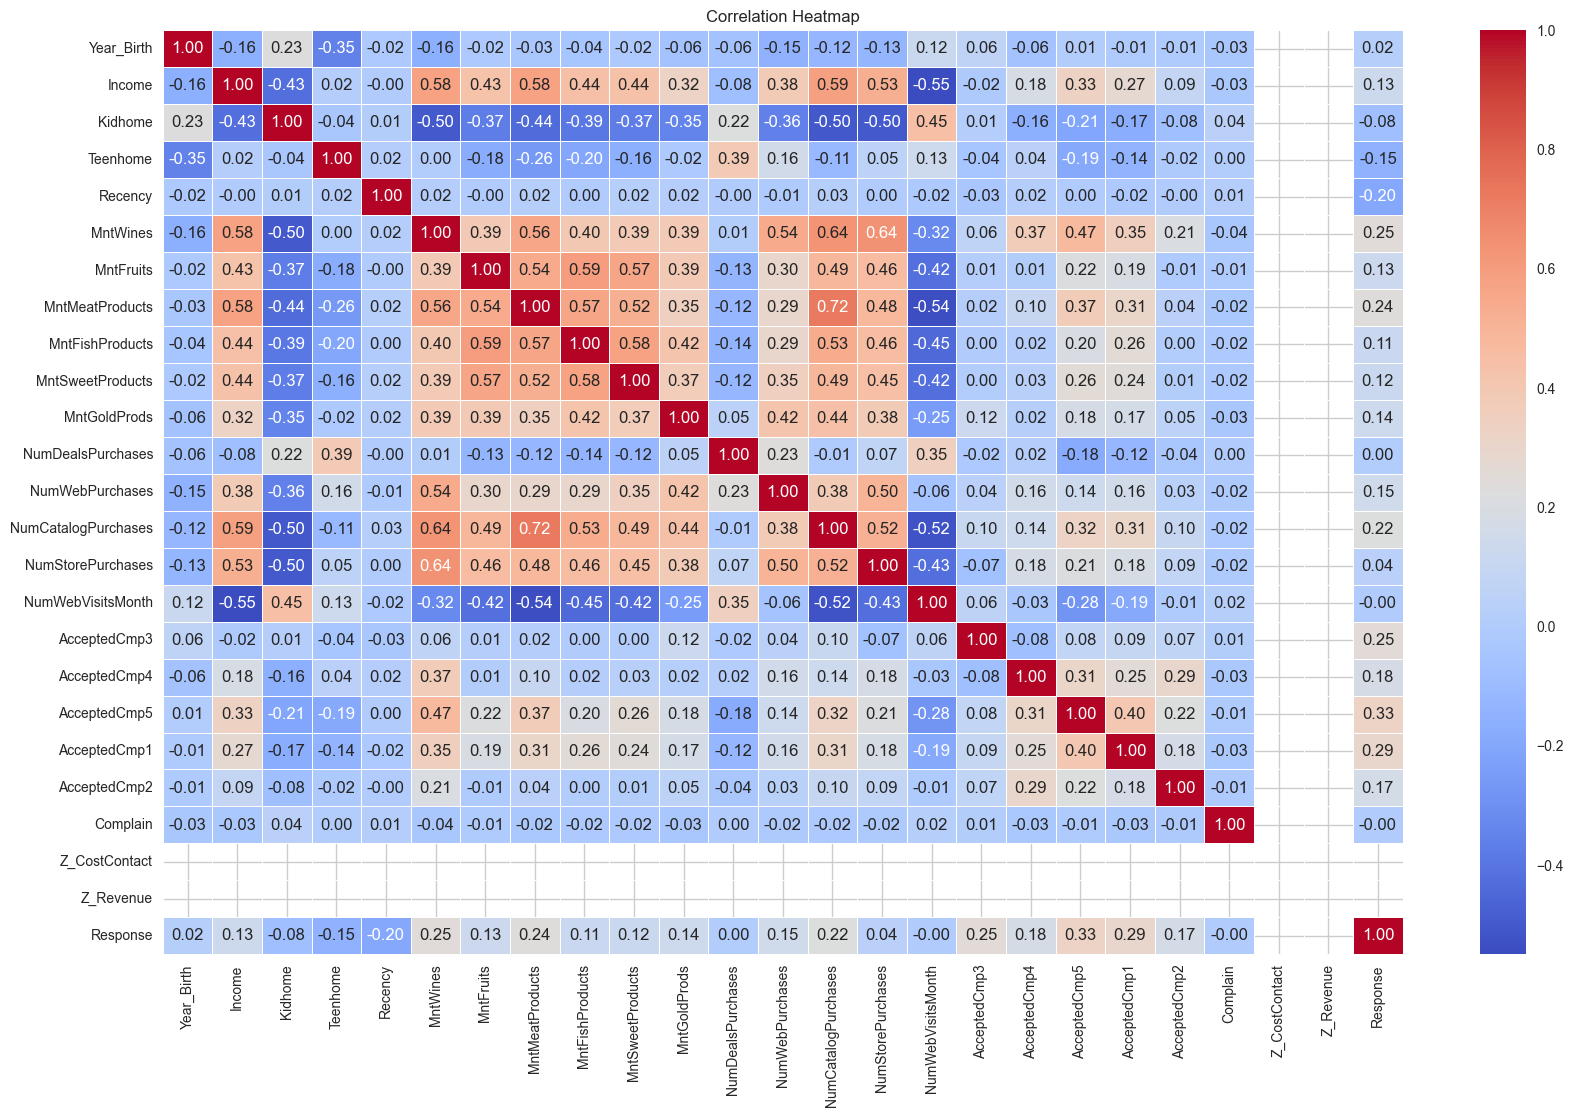

In [8]:
# Select only the numeric columns
numeric_df = copied_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
 
# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
 
#Save the image below
plt.savefig("Correlation Heatmap(Before).png",dpi = 300,bbox_inches ="tight")

plt.show();

In [9]:
copied_df = copied_df.drop(['Z_CostContact','Z_Revenue'], axis = 1)

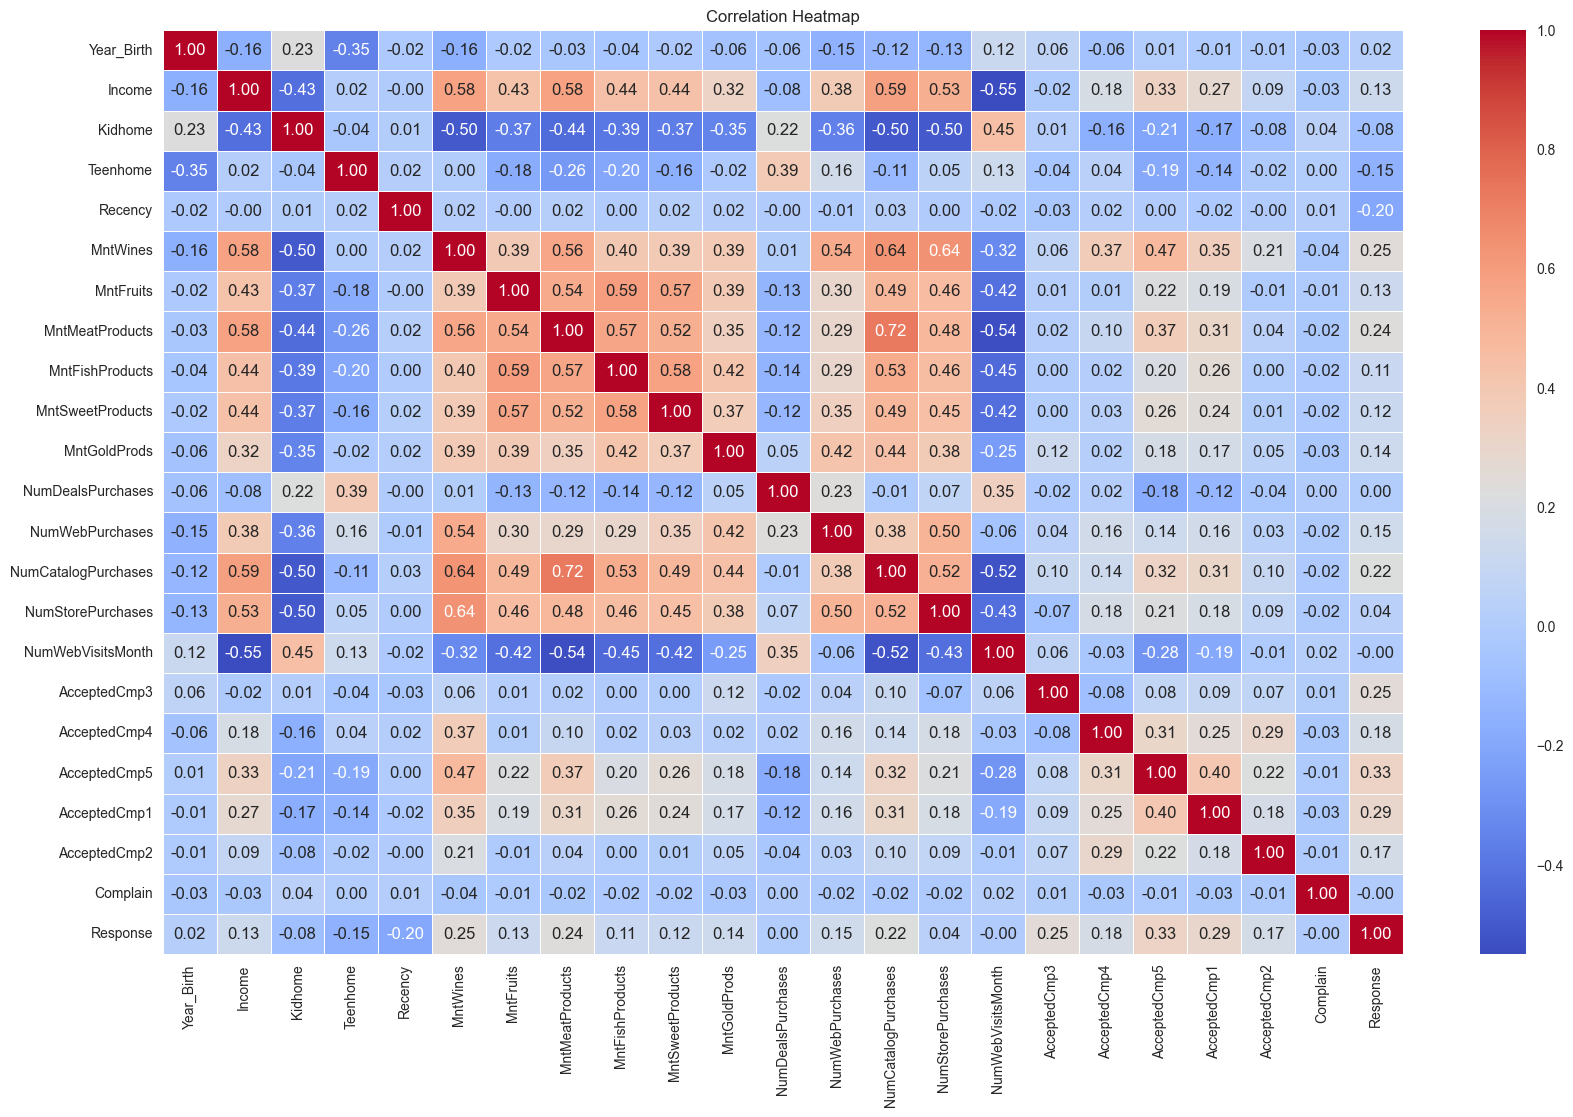

In [10]:
# Select only the numeric columns
numeric_df = copied_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
 
# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
 
#Save the image below
plt.savefig("Correlation Heatmap(after).png",dpi = 300,bbox_inches ="tight")

plt.show();

In [11]:
copied_df['New_Dt_Customer'] = pd.to_datetime(copied_df['Dt_Customer'], format='%d-%m-%Y')
copied_df = copied_df.drop('Dt_Customer', axis = 1)
copied_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Recency              2240 non-null   int64         
 7   MntWines             2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

In [12]:
copied_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,New_Dt_Customer
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,2012-09-04
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,2014-03-08
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,2013-08-21
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,2014-02-10
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,2014-01-19


In [13]:
# Extract year, month, and day into separate columns
copied_df['Year'] = copied_df['New_Dt_Customer'].dt.year
copied_df['Month'] = copied_df['New_Dt_Customer'].dt.month
copied_df['Day'] = copied_df['New_Dt_Customer'].dt.day

copied_df = copied_df.drop('New_Dt_Customer', axis = 1)

In [14]:
copied_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Month,Day
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,2012,9,4
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,2014,3,8
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,2013,8,21
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,0,2014,2,10
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,0,2014,1,19


In [15]:
#Total spendings on various items
copied_df["AmountSpent"] = copied_df["MntWines"]+ copied_df["MntFruits"]+ copied_df["MntMeatProducts"]+ copied_df["MntFishProducts"]+ copied_df["MntSweetProducts"]+ copied_df["MntGoldProds"]

#For clarity
copied_df=copied_df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

copied_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Month,Day,AmountSpent
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,1,2012,9,4,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,2014,3,8,27
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,2013,8,21,776
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,2014,2,10,53
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,2014,1,19,422


In [16]:
#Age of customer today 
copied_df["Age"] = (2024-copied_df["Year_Birth"])

copied_df = copied_df.drop('Year_Birth', axis = 1)

In [17]:
#Deriving living situation by marital status"Alone"
copied_df["Living_With_Partner"] = copied_df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
copied_df["Children"]=copied_df["Kidhome"]+copied_df["Teenhome"]

#Feature for total members in the householde
copied_df["Family_Size"] = copied_df["Living_With_Partner"].replace({"Alone": 1, "Partner":2}) + copied_df["Children"]

#Drop redundant columns
copied_df = copied_df.drop('Marital_Status', axis = 1)

In [18]:
copied_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   Wines                2240 non-null   int64  
 6   Fruits               2240 non-null   int64  
 7   Meat                 2240 non-null   int64  
 8   Fish                 2240 non-null   int64  
 9   Sweets               2240 non-null   int64  
 10  Gold                 2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [19]:
copied_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Year,Month,Day,AmountSpent,Age,Living_With_Partner,Children,Family_Size
0,Graduation,58138.0,0,0,58,635,88,546,172,88,...,0,1,2012,9,4,1617,67,Alone,0,1
1,Graduation,46344.0,1,1,38,11,1,6,2,1,...,0,0,2014,3,8,27,70,Alone,2,3
2,Graduation,71613.0,0,0,26,426,49,127,111,21,...,0,0,2013,8,21,776,59,Partner,0,2
3,Graduation,26646.0,1,0,26,11,4,20,10,3,...,0,0,2014,2,10,53,40,Partner,1,3
4,PhD,58293.0,1,0,94,173,43,118,46,27,...,0,0,2014,1,19,422,43,Partner,1,3


### Preprocessing

In [20]:
# Select columns with object data type
categorical_features = copied_df.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['Education', 'Living_With_Partner'], dtype='object')

In [21]:
copied_df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [22]:
#Segmenting education levels in three groups
copied_df["Education"]=copied_df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [23]:
copied_df['Education'].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [24]:
#Feature for total members in the householde
copied_df['Education'] = copied_df['Education'].replace({"Undergraduate": 0, "Graduate":1, "Postgraduate": 2})

In [25]:
copied_df['Living_With_Partner'].value_counts()

Living_With_Partner
Partner    1444
Alone       796
Name: count, dtype: int64

In [26]:
#Feature for total members in the householde
copied_df['Living_With_Partner'] = copied_df['Living_With_Partner'].replace({"Alone": 0, "Partner":1})

In [27]:
copied_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Year,Month,Day,AmountSpent,Age,Living_With_Partner,Children,Family_Size
0,1,58138.0,0,0,58,635,88,546,172,88,...,0,1,2012,9,4,1617,67,0,0,1
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,2014,3,8,27,70,0,2,3
2,1,71613.0,0,0,26,426,49,127,111,21,...,0,0,2013,8,21,776,59,1,0,2
3,1,26646.0,1,0,26,11,4,20,10,3,...,0,0,2014,2,10,53,40,1,1,3
4,2,58293.0,1,0,94,173,43,118,46,27,...,0,0,2014,1,19,422,43,1,1,3


In [28]:
copied_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int64  
 1   Income               2240 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   Wines                2240 non-null   int64  
 6   Fruits               2240 non-null   int64  
 7   Meat                 2240 non-null   int64  
 8   Fish                 2240 non-null   int64  
 9   Sweets               2240 non-null   int64  
 10  Gold                 2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [29]:
copied_df.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Year,Month,Day,AmountSpent,Age,Living_With_Partner,Children,Family_Size
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1.267411,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,0.009375,0.149107,2013.028125,6.467411,15.638393,605.798214,55.194196,0.644643,0.950446,2.595089
std,0.652347,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,0.096391,0.356274,0.684554,3.486695,8.790680,602.249288,11.984069,0.478728,0.751803,0.906959
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2012.000000,1.000000,1.000000,5.000000,28.000000,0.000000,0.000000,1.000000
25%,1.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,2013.000000,3.000000,8.000000,68.750000,47.000000,0.000000,0.000000,2.000000
50%,1.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,0.000000,0.000000,2013.000000,6.000000,16.000000,396.000000,54.000000,1.000000,1.000000,3.000000
75%,2.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,0.000000,0.000000,2013.000000,10.000000,23.000000,1045.500000,65.000000,1.000000,1.000000,3.000000
max,2.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,2014.000000,12.000000,31.000000,2525.000000,131.000000,1.000000,3.000000,5.000000


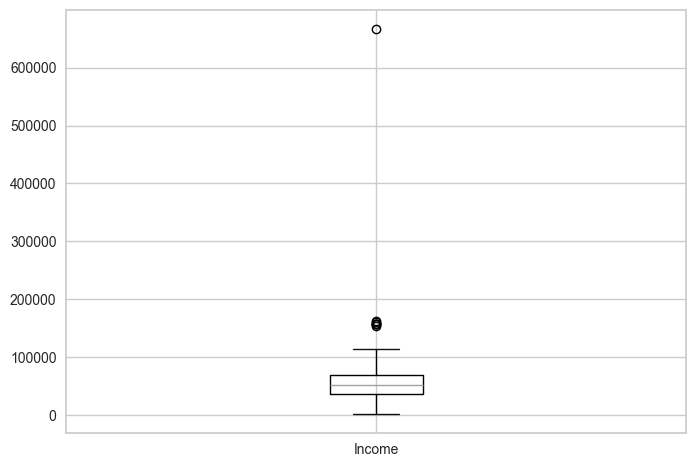

In [30]:
copied_df[['Income']].boxplot()
plt.show();

In [31]:
# Calculate the first quartile (Q1)
Q1 = copied_df['Income'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = copied_df['Income'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower limit
lower_limit = Q1 - 1.5 * IQR

# Calculate the upper limit
upper_limit = Q3 + 1.5 * IQR

# Count the number of outliers and valid rows
outliers_mask = (copied_df['Income'] < lower_limit) | (copied_df['Income'] > upper_limit)
num_outliers = outliers_mask.sum()
num_valid = len(copied_df) - num_outliers

print(f"Number of rows to be replaced as outliers: {num_outliers}")
print(f"Number of valid rows remaining: {num_valid}")
print(f"Sum of Valid rows and outliers: {num_outliers + num_valid}")

# Replace outliers above the upper limit with upper limit
copied_df.loc[copied_df['Income'] > upper_limit, 'Income'] = upper_limit

# Replace outliers below the lower limit with lower limit
copied_df.loc[copied_df['Income'] < lower_limit, 'Income'] = lower_limit

print(f"Number of rows after replacing outliers: {len(copied_df)}")

Number of rows to be replaced as outliers: 8
Number of valid rows remaining: 2232
Sum of Valid rows and outliers: 2240
Number of rows after replacing outliers: 2240


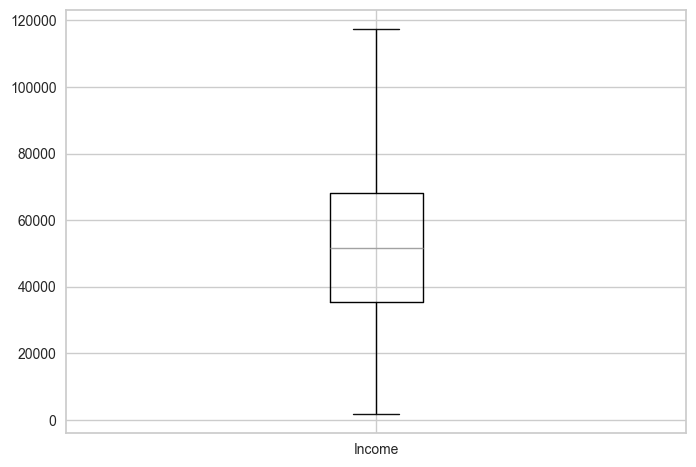

In [32]:
copied_df[['Income']].boxplot()
plt.show();

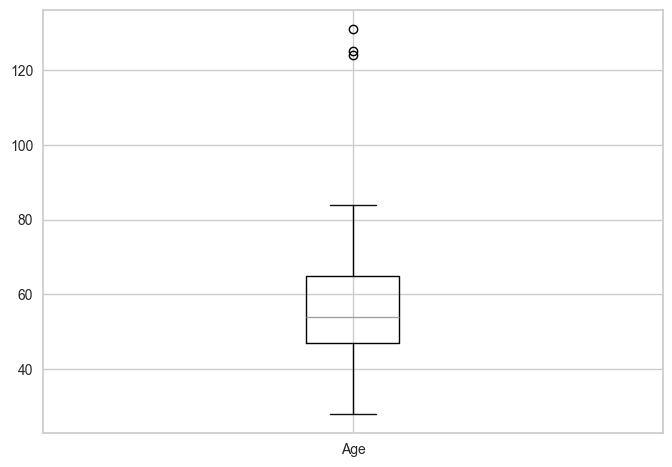

In [33]:
copied_df[['Age']].boxplot()
plt.show();

In [34]:
# Calculate the first quartile (Q1)
Q1 = copied_df['Age'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = copied_df['Age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower limit
lower_limit = Q1 - 1.5 * IQR

# Calculate the upper limit
upper_limit = Q3 + 1.5 * IQR

# Count the number of outliers and valid rows
outliers_mask = (copied_df['Age'] < lower_limit) | (copied_df['Age'] > upper_limit)
num_outliers = outliers_mask.sum()
num_valid = len(copied_df) - num_outliers

print(f"Number of rows to be replaced as outliers: {num_outliers}")
print(f"Number of valid rows remaining: {num_valid}")
print(f"Sum of Valid rows and outliers: {num_outliers + num_valid}")

# Replace outliers above the upper limit with upper limit
copied_df.loc[copied_df['Age'] > upper_limit, 'Age'] = upper_limit

# Replace outliers below the lower limit with lower limit
copied_df.loc[copied_df['Age'] < lower_limit, 'Age'] = lower_limit

print(f"Number of rows after replacing outliers: {len(copied_df)}")

Number of rows to be replaced as outliers: 3
Number of valid rows remaining: 2237
Sum of Valid rows and outliers: 2240
Number of rows after replacing outliers: 2240


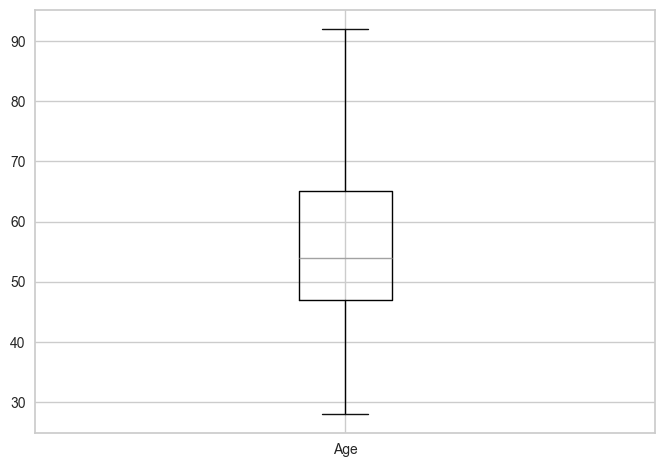

In [35]:
copied_df[['Age']].boxplot()
plt.show();

In [36]:
copied_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Year,Month,Day,AmountSpent,Age,Living_With_Partner,Children,Family_Size
0,1,58138.0,0,0,58,635,88,546,172,88,...,0,1,2012,9,4,1617,67,0,0,1
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,2014,3,8,27,70,0,2,3
2,1,71613.0,0,0,26,426,49,127,111,21,...,0,0,2013,8,21,776,59,1,0,2
3,1,26646.0,1,0,26,11,4,20,10,3,...,0,0,2014,2,10,53,40,1,1,3
4,2,58293.0,1,0,94,173,43,118,46,27,...,0,0,2014,1,19,422,43,1,1,3


In [37]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

to_drop = copied_df.copy()

df_use = to_drop.drop(cols_drop, axis=1)
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int64  
 1   Income               2240 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   Wines                2240 non-null   int64  
 6   Fruits               2240 non-null   int64  
 7   Meat                 2240 non-null   int64  
 8   Fish                 2240 non-null   int64  
 9   Sweets               2240 non-null   int64  
 10  Gold                 2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [38]:
#Scaling
scaler = StandardScaler()
scaler.fit(df_use)
scaled_df_use = pd.DataFrame(scaler.transform(df_use),columns= df_use.columns )
scaled_df_use.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Year,Month,Day,AmountSpent,Age,Living_With_Partner,Children,Family_Size
0,-0.410013,0.299208,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,-0.550785,0.693904,-1.502225,0.726520,-1.324242,1.679417,1.007064,-1.346874,-1.264505,-1.759115
1,-0.410013,-0.264251,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,-1.166125,-0.130463,1.420036,-0.994691,-0.869113,-0.961275,1.261969,-1.346874,1.396361,0.446548
2,-0.410013,0.942978,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,1.295237,-0.542647,-0.041094,0.439652,0.610056,0.282673,0.327318,0.742460,-1.264505,-0.656283
3,-0.410013,-1.205325,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,-0.550785,0.281720,1.420036,-1.281560,-0.641549,-0.918094,-1.287080,0.742460,0.065928,0.446548
4,1.123256,0.306613,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,0.064556,-0.130463,1.420036,-1.568428,0.382491,-0.305254,-1.032175,0.742460,0.065928,0.446548


### Principal component analysis (PCA)

In [39]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=5)
pca.fit(scaled_df_use)
PCA_use = pd.DataFrame(pca.transform(scaled_df_use), columns=(["PCA1","PCA2", "PCA3", "PCA4", "PCA5"]))
PCA_use.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,4.706351,-0.346858,2.354680,-0.315311,1.133504
1,-2.827801,-0.017881,-2.070748,-0.553233,1.013535
2,2.274536,-0.558986,0.231193,0.003012,-0.449382
3,-2.678811,-1.642939,-1.183279,1.353756,0.360813
4,-0.499224,0.080780,-1.547181,1.257379,0.501396


In [40]:
PCA_use.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA1,2240.0,1.395709e-16,2.797483,-5.877381,-2.487645,-0.739295,2.412135,7.355011
PCA2,2240.0,1.903239e-17,1.643315,-4.012286,-1.295664,-0.159647,1.167435,6.322352
PCA3,2240.0,-1.030921e-17,1.346233,-3.228943,-0.970357,-0.029251,0.957799,5.161849
PCA4,2240.0,2.537653e-17,1.185390,-3.596590,-0.816206,0.026812,0.828981,4.009641
PCA5,2240.0,-3.489272e-17,1.091834,-3.062600,-0.761158,-0.055960,0.733265,5.153153


### Clustering

#### K-means

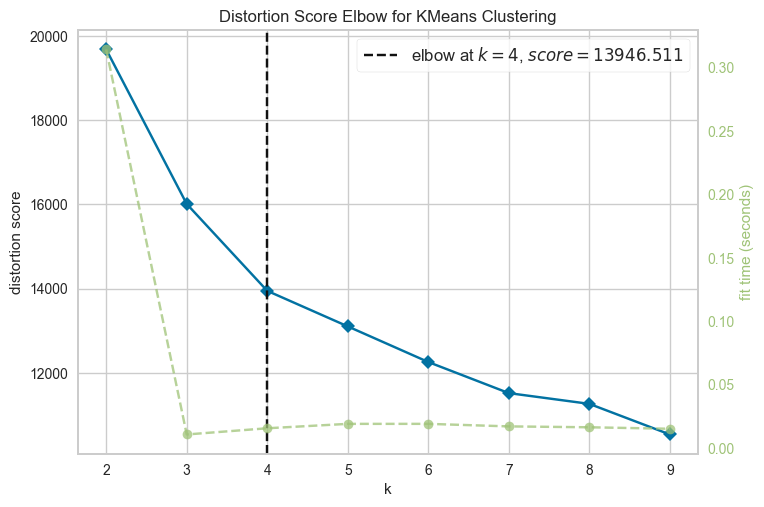

Optimal number of clusters: 4


In [41]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))  # Search for optimal k from 2 to 10
visualizer.fit(PCA_use)

#Save the image below
plt.savefig("Elbow Graph.png",dpi = 300,bbox_inches ="tight")

visualizer.show()

print("Optimal number of clusters:", visualizer.elbow_value_)

In [42]:
np.random.seed(42)

# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=visualizer.elbow_value_)

kmeans.fit(PCA_use)

KMeans(n_clusters=4)

In [43]:
# Add cluster labels to the original DataFrame or a copy of it
copied_df['cluster'] = kmeans.labels_

In [44]:
cluster_counts = copied_df['cluster'].value_counts()
cluster_counts

cluster
0    652
1    558
3    530
2    500
Name: count, dtype: int64

### Cluster Distribution

In [45]:
# plt.figure(figsize=(8, 6))
# plt.pie(cluster_counts,labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
# plt.title('Cluster Distribution')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()

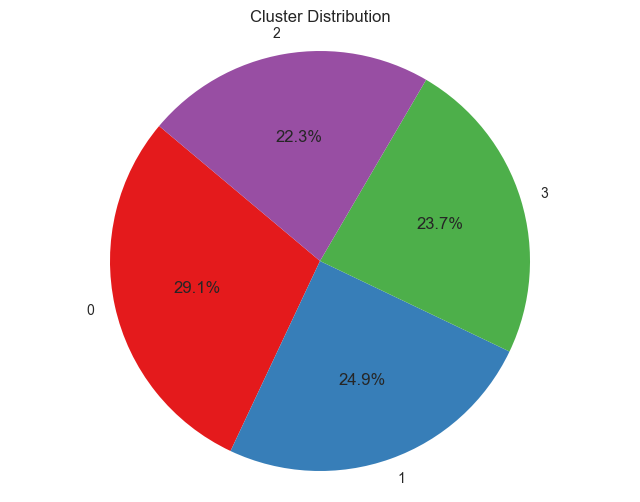

In [46]:
custom_colors = sns.color_palette('Set1', 4)  # Adjust 4 to the number of colors needed


# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#Save the image below
plt.savefig("Pie Chart(clusters).png",dpi = 300,bbox_inches ="tight")
plt.show()

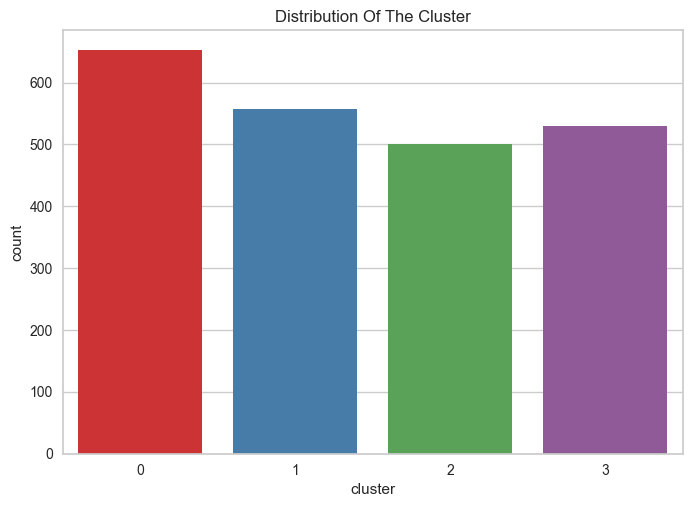

In [47]:
custom_colors = sns.color_palette('Set1', 4)

#Plotting countplot of clusters
#pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=copied_df["cluster"], palette= custom_colors)
pl.set_title("Distribution Of The Cluster")
#Save the image below
plt.savefig("Bar chart (clusters).png",dpi = 300,bbox_inches ="tight")
plt.show()

### Cluster's Profile Based On Income And Amount Spent

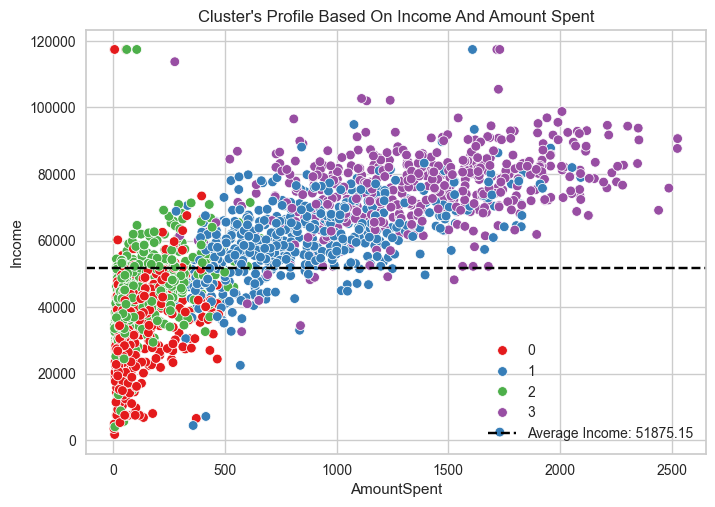

In [48]:
# Calculate average income
average_income = copied_df['Income'].mean()

# Custom list of colors for each cluster
custom_colors = sns.color_palette('Set1', 4)

# Plotting with seaborn
pal = sns.color_palette('viridis', copied_df['cluster'].nunique())
pl = sns.scatterplot(data=copied_df, x='AmountSpent', y='Income', hue='cluster', palette=custom_colors)
pl.set_title("Cluster's Profile Based On Income And Amount Spent")

# Annotate average income
plt.axhline(y=average_income, color='black', linestyle='--', label=f'Average Income: {average_income:.2f}')
plt.legend()

#Save the image below
plt.savefig("Relationship between Income and Amount spent on clusters.png",dpi = 300,bbox_inches ="tight")

plt.show()

### The income vs spending plot shows the cluster pattern

**cluster 0:** As income is increasing, spending is also increasing. However, the majority of the income in this cluster is below the average income

**cluster 1:** As income is increasing, spending is also increasing. However, the majority of the income in this cluster is above the average income

**cluster 2:** For this cluster, spending is consistently low, and the majority of income here is below average. So income is also low

**cluster 3:** For this cluster, income is generally above average and spending is also high. Also as income increases, spending increases

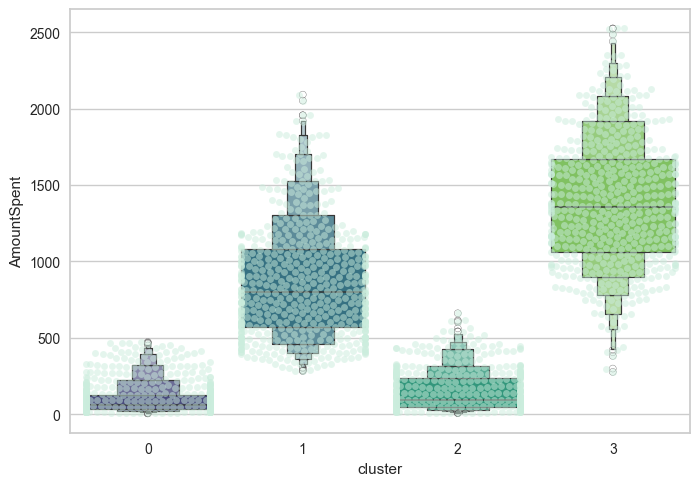

In [49]:
plt.figure()
pl=sns.swarmplot(x=copied_df["cluster"], y=copied_df["AmountSpent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=copied_df["cluster"], y=copied_df["AmountSpent"], palette=pal)
plt.show()

NB: As seen above, we can see that our biggest cluster is 3, which indicates people with high income and high purchasing habit. This is followed by the cluster 1.

The campaigns haven't received much attention so far. Participation has been minimal overall, and none of the participants have taken part in all five campaigns. It seems that more focused and carefully planned campaigns are needed to increase sales.

In [50]:
# Calculate the mean Income, and Amount each cluster spent
cluster_summary = copied_df.groupby('cluster').agg({
    'Income': 'mean',
    'AmountSpent': 'mean',
    'Age': 'mean'
}).reset_index()

# Print the cluster summary
print(cluster_summary)

   cluster        Income  AmountSpent        Age
0        0  31377.047942   102.829755  48.151840
1        1  60599.861574   865.376344  59.259857
2        2  43327.239022   152.974000  59.462000
3        3  75970.112274  1378.445283  55.354717


### Conclusion

Based on the above summary, I have come to the below ranking of each of the clusters and a custom marketing strategy to improve the performance of each cluster.

### Cluster Ratings and Marketing Strategy:

1. **Cluster 0:**
   - **Income**: $31,377
   - **Amount Spent**: $102.83
   - **Age**: 48.15
   - **Rating**: This cluster has relatively lower income and spending compared to others.
   - **Strategy**: Target cost-effective products or services that cater to middle-income brackets. Emphasize affordability and value for money in marketing campaigns.

2. **Cluster 1:**
   - **Income**: $60,625
   - **Amount Spent**: $866.28
   - **Age**: 59.28
   - **Rating**: This cluster shows higher income and moderate spending.
   - **Strategy**: Focus on luxury or premium products/services. Highlight quality, exclusivity, and personalized customer service to attract high-spending individuals.

3. **Cluster 2:**
   - **Income**: $43,333
   - **Amount Spent**: $153.39
   - **Age**: 59.44
   - **Rating**: Moderate income and spending levels, with a slightly older demographic.
   - **Strategy**: Offer promotions or bundles that appeal to this age group. Highlight durability, reliability, and ease of use in your marketing messages.

4. **Cluster 3:**
   - **Income**: $75,970
   - **Amount Spent**: $1378.45
   - **Age**: 55.35
   - **Rating**: High income and significant spending.
   - **Strategy**: Position high-end or premium products/services. Focus on innovation, prestige, and the latest trends to appeal to affluent consumers.

### General Recommendations:
- **Segmented Marketing**: Tailor marketing messages and promotions specifically for each cluster based on their income, spending behavior, and age.
- **Personalization**: Use customer data to personalize offers and recommendations.
- **Customer Engagement**: Implement loyalty programs or special incentives to encourage repeat purchases.
- **Feedback Loop**: Regularly gather feedback to refine marketing strategies and improve customer satisfaction.

By focusing on these strategies, we can effectively target each cluster's unique characteristics and improve engagement and sales across different segments of your customer base.